# Dependencies & Constants

Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import h5py
from tensorflow import keras
from tensorflow.python.client import device_lib
from random import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install keras-tuner

In [2]:
import keras_tuner as kt

In [3]:
print(device_lib.list_local_devices())
print(tf.__version__)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2699832972795693262
xla_global_id: -1
]
2.13.0


Image shape parameters

In [4]:
input_height = 128
input_width = 128
n_channels = 1

Class labels

In [5]:
class_no=3
labels = {0:'Normal', 1:'Bacterial', 2:'Viral'}

To save models

In [6]:
model_path = 'C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_'

# Last saved model number
model_count = 80

# Model Architecture

In [7]:
def Pneumonia(hp):

    input_images=tf.keras.layers.Input(shape=(input_height,input_width,n_channels))

    x = tf.keras.layers.Conv2D(hp.Int('layer1_units', min_value=4, max_value=8, step=1),
                               (3,3),strides=(1,1),padding='same', use_bias=False)(input_images)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    x = tf.keras.layers.Conv2D(hp.Int('layer2_units', min_value=4, max_value=16, step=1),
                               (3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #first triple
    n1 = hp.Int('triple1_units', min_value=32, max_value=64, step=1)
    x = tf.keras.layers.Conv2D(n1,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n1//2,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n1,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #second triple
    n2 = hp.Int('triple2_units', min_value=64, max_value=128, step=1)
    x = tf.keras.layers.Conv2D(n2,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n2//2,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n2,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #third triple
    n3 = hp.Int('triple3_units', min_value=128, max_value=256, step=1)
    x = tf.keras.layers.Conv2D(n3,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n3//2,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n3,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #fourth triple
    n4 = hp.Int('triple4_units', min_value=256, max_value=512, step=32)
    x = tf.keras.layers.Conv2D(n4,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n4//2,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(n4,(3,3),strides=(1,1),padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    #ending network
    L1 = tf.keras.layers.MaxPooling2D((4, 4),strides=(1,1),padding='valid')(x)
    L2 = tf.keras.layers.MaxPooling2D((3, 3),strides=(1,1),padding='valid')(x)
    L3 = tf.keras.layers.MaxPooling2D((2, 2),strides=(1,1),padding='valid')(x)

    FL1 = tf.keras.layers.Flatten()(L1)
    FL2 = tf.keras.layers.Flatten()(L2)
    FL3 = tf.keras.layers.Flatten()(L3)
    
    x = tf.keras.layers.Concatenate(axis=1)([FL1,FL2,FL3])
    x = tf.keras.layers.Dense(class_no,activation='softmax')(x)

    # Create model.
    model=tf.keras.models.Model(inputs=input_images,outputs=x)

    model.compile(optimizer=tf.keras.optimizers.Adagrad(
        hp.Float('learning_rate', 1e-4, 1e-1, sampling='log'),
        hp.Float('initial_accumulator_value', 1e-4, 1e-1, sampling='log'),
        hp.Float('epsilon', 1e-07, 1e-04, sampling='log')), 
        loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [41]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 128, 128, 6)          54        ['input_2[0][0]']             
                                                                                                  
 batch_normalization_14 (Ba  (None, 128, 128, 6)          24        ['conv2d_14[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 leaky_re_lu_14 (LeakyReLU)  (None, 128, 128, 6)          0         ['batch_normalization_14

 batch_normalization_22 (Ba  (None, 8, 8, 199)            796       ['conv2d_22[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 leaky_re_lu_22 (LeakyReLU)  (None, 8, 8, 199)            0         ['batch_normalization_22[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 8, 8, 99)             19701     ['leaky_re_lu_22[0][0]']      
                                                                                                  
 batch_normalization_23 (Ba  (None, 8, 8, 99)             396       ['conv2d_23[0][0]']           
 tchNormalization)                                                                                
          

# Load Data

Load complete dataset from h5 file to arrays x and y

In [8]:
dest_filepath = 'C:/Users/User/Desktop/project/database/3/main_project/complete_dataseth5_1.h5'

with h5py.File(dest_filepath, "r") as f:
    x = f["input_data"][:]
    y = f["input_labels"][:]
f.close()
x = np.reshape(x, (x.shape[0], 128, 128, 1))
print('x shape =', x.shape, '| y shape =', y.shape)

x shape = (8008, 128, 128, 1) | y shape = (8008,)


## Preview Images

Plot some images from the dataset

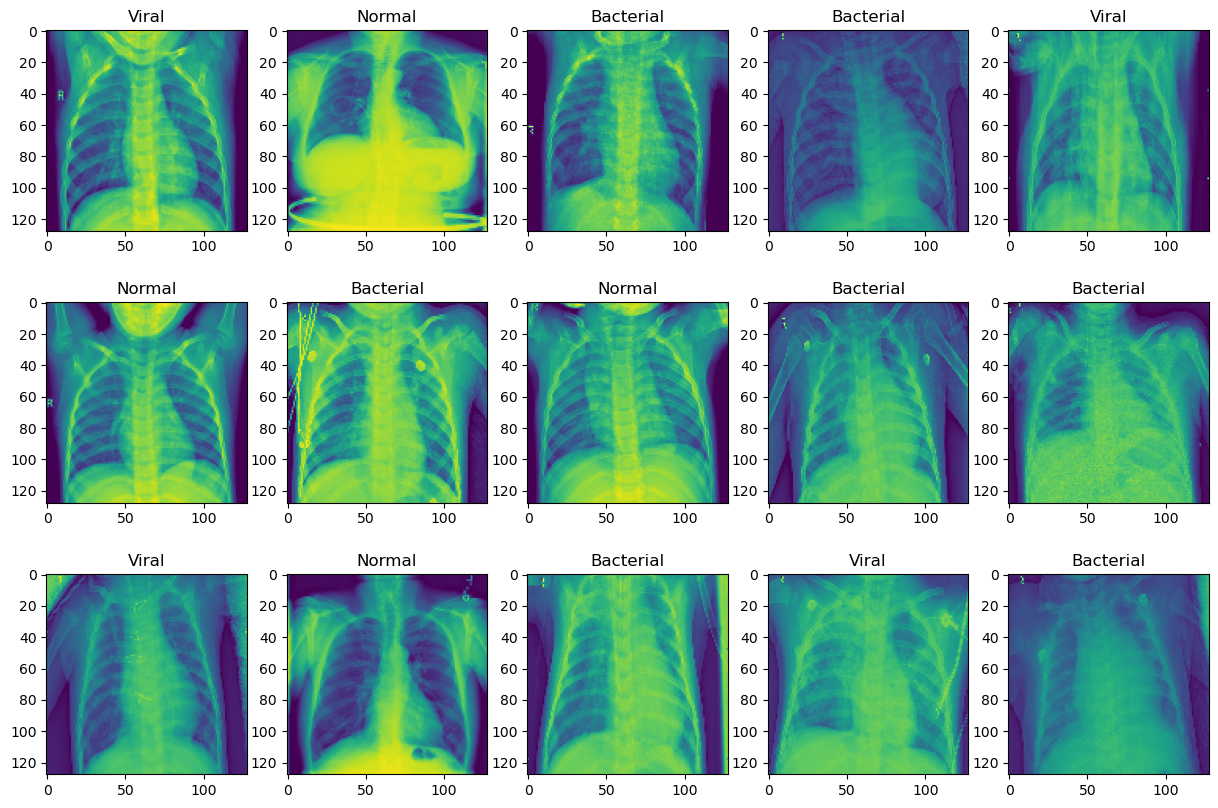

In [9]:
plt.figure(figsize=(15,10))
for i in range(3):
    for j in range(5):
        idx = 5*i+j
        label_no = y[idx]
        plt.subplot(3,5,idx+1)
        im = np.squeeze(x[idx])
        plt.imshow(im)
        plt.title(labels[label_no])

## Train, validation & test split

train, validation and test split using h5file and sklearn <br>
[reference](https://www.machinecurve.com/index.php/2020/11/16/how-to-easily-create-a-train-test-split-for-your-machine-learning-model/)

> Shuffling (i.e. randomly drawing) samples is applied as part of the fit. Using a random_state, we can seed the random number generator to make its behavior replicable.

In [10]:
random_state = 55
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=random_state)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=random_state)
print('train size: ', len(y_train), '\t val size: ', len(y_val), '\t test size: ', len(y_test))

train size:  6006 	 val size:  1001 	 test size:  1001


In [62]:
pip install split-folders[full]


  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [65]:
import splitfolders

# Define the input folder containing all the images
input_folder = 'C:/Users/User/Desktop/project/database/3'

# Define the output folder where the split dataset will be saved
output_folder = 'C:/Users/User/Desktop/project/database/2'

# Split the dataset into train, validation, and test sets with a ratio of 70:20:10
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .2, .1), group_prefix=None)

print("Dataset split successfully.")


Copying files: 8019 files [00:33, 242.83 files/s]

Dataset split successfully.


## One-hot encoding / Categorical encoding

One hot encoding for y_train and y_test

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_val = tf.keras.utils.to_categorical(y_val, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

## Data Augmentation

In [49]:
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, fill_mode='nearest')
print(datagen)

# Hyperparameter Tuning Using Keras Tuner

Create a hyperband tuner instance

In [13]:
tuner = kt.Hyperband(Pneumonia, objective='val_accuracy', max_epochs=15, hyperband_iterations=3)

Reloading Tuner from .\untitled_project\tuner0.json


Early stopping callback to stop training if val_loss is not improving within 5 epochs.

In [14]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Hyperparameter search using hyperband tuner

In [15]:
tuner.search(datagen.flow(x_train, y_train, batch_size=4), steps_per_epoch=x_train.shape[0],
                      verbose=2, validation_data=(x_val, y_val), callbacks=[stop_early], workers=4)

Trial 7 Complete [00h 29m 34s]
val_accuracy: 0.847152829170227

Best val_accuracy So Far: 0.847152829170227
Total elapsed time: 10h 20m 46s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
6                 |7                 |layer1_units
4                 |8                 |layer2_units
36                |41                |triple1_units
119               |111               |triple2_units
191               |136               |triple3_units
384               |480               |triple4_units
0.005873          |0.012056          |learning_rate
0.012938          |0.00088487        |initial_accumulator_value
1.0316e-06        |5.4135e-05        |epsilon
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: 

Retrieve the best hyperparameters obtained

In [16]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

Best hyperparameters obtained 

In [17]:
print('layer1_units: ', best_hyperparameters.get('layer1_units'))
print('layer2_units: ', best_hyperparameters.get('layer2_units'))
print('triple1_units: ', best_hyperparameters.get('triple1_units'))
print('triple2_units: ', best_hyperparameters.get('triple2_units'))
print('triple3_units: ', best_hyperparameters.get('triple3_units'))
print('triple4_units: ', best_hyperparameters.get('triple4_units'))
print('learning_rate: ', best_hyperparameters.get('learning_rate'))
print('epsilon: ', best_hyperparameters.get('epsilon'))
print('initial_accumulator_value: ', best_hyperparameters.get('initial_accumulator_value'))

layer1_units:  7
layer2_units:  8
triple1_units:  41
triple2_units:  111
triple3_units:  136
triple4_units:  480
learning_rate:  0.01205597728980598
epsilon:  5.413518586601094e-05
initial_accumulator_value:  0.0008848688594274479


### Restoring previously obtained best hyperparameters

In [18]:
hps = kt.HyperParameters()

In [19]:
hps.values = {
    'layer1_units':  6,
    'layer2_units':  8,
    'triple1_units': 61, 
    'triple2_units': 123, 
    'triple3_units': 199, 
    'triple4_units': 288, 
    'learning_rate': 0.0018016,
    'initial_accumulator_value': 0.00041422, 
    'epsilon': 6.687e-05
}

Create model with the selected hyperparameters

In [20]:
model = tuner.hypermodel.build(hps)

# Training

### Train Model

Save trained model after each epoch using checkpoint

In [21]:
model_count+=1
path = model_path+str(model_count)
print(path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(path+'/checkpoint_{epoch:02d}', save_freq='epoch') 

C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81


In [23]:
epoch_no=20
print('Training')
H=model.fit(datagen.flow(x_train, y_train, batch_size=4), steps_per_epoch=x_train.shape[0],
                      epochs=epoch_no, verbose=2, callbacks=[checkpoint, stop_early], 
                      validation_data=(x_val, y_val), workers=4)

Training
Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_01\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_01\assets


6006/6006 - 1287s - loss: 0.3705 - accuracy: 0.8312 - val_loss: 0.3241 - val_accuracy: 0.8651 - 1287s/epoch - 214ms/step
Epoch 2/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_02\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_02\assets


6006/6006 - 1189s - loss: 0.3049 - accuracy: 0.8658 - val_loss: 0.3474 - val_accuracy: 0.8482 - 1189s/epoch - 198ms/step
Epoch 3/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_03\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_03\assets


6006/6006 - 1109s - loss: 0.2610 - accuracy: 0.8881 - val_loss: 0.2799 - val_accuracy: 0.8971 - 1109s/epoch - 185ms/step
Epoch 4/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_04\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_04\assets


6006/6006 - 836s - loss: 0.2203 - accuracy: 0.9074 - val_loss: 0.3319 - val_accuracy: 0.8761 - 836s/epoch - 139ms/step
Epoch 5/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_05\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_05\assets


6006/6006 - 932s - loss: 0.1900 - accuracy: 0.9210 - val_loss: 0.2781 - val_accuracy: 0.8971 - 932s/epoch - 155ms/step
Epoch 6/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_06\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_06\assets


6006/6006 - 892s - loss: 0.1559 - accuracy: 0.9381 - val_loss: 0.2648 - val_accuracy: 0.8981 - 892s/epoch - 149ms/step
Epoch 7/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_07\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_07\assets


6006/6006 - 825s - loss: 0.1308 - accuracy: 0.9498 - val_loss: 0.2814 - val_accuracy: 0.8961 - 825s/epoch - 137ms/step
Epoch 8/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_08\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_08\assets


6006/6006 - 789s - loss: 0.1136 - accuracy: 0.9566 - val_loss: 0.3088 - val_accuracy: 0.8951 - 789s/epoch - 131ms/step
Epoch 9/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_09\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_09\assets


6006/6006 - 756s - loss: 0.0986 - accuracy: 0.9628 - val_loss: 0.3013 - val_accuracy: 0.9021 - 756s/epoch - 126ms/step
Epoch 10/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_10\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_10\assets


6006/6006 - 738s - loss: 0.0854 - accuracy: 0.9679 - val_loss: 0.2805 - val_accuracy: 0.9051 - 738s/epoch - 123ms/step
Epoch 11/20
INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_11\assets


INFO:tensorflow:Assets written to: C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81\checkpoint_11\assets


6006/6006 - 736s - loss: 0.0742 - accuracy: 0.9742 - val_loss: 0.3100 - val_accuracy: 0.8981 - 736s/epoch - 123ms/step


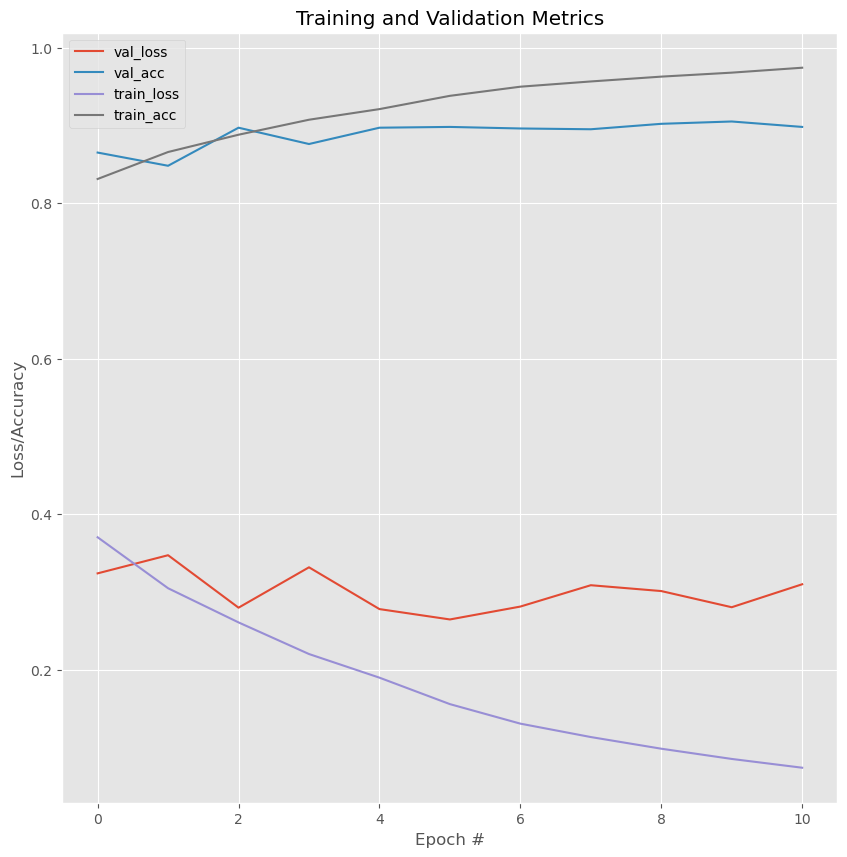

Best model is from checkpoint #10
loss: 0.0854 accuracy: 0.9679 val_loss: 0.2805 val_accuracy: 0.9051


In [26]:
N = np.arange(0, len(H.history["val_loss"]))
plt.style.use("ggplot")
plt.figure()
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.title("Training and Validation Metrics")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(path + "/plot.png")
plt.show(block=False)

best_val_accuracy = np.max(H.history["val_accuracy"])
best_val_accuracy_index = np.argmax(H.history["val_accuracy"])
output = "Best model is from checkpoint #" + str(best_val_accuracy_index + 1) + "\n"
output += "loss: {:.4f} accuracy: {:.4f} val_loss: {:.4f} val_accuracy: {:.4f}".format(
    H.history["loss"][best_val_accuracy_index],
    H.history["accuracy"][best_val_accuracy_index],
    H.history["val_loss"][best_val_accuracy_index],
    best_val_accuracy
)

print(output)


### Test Model

In [28]:
# Calculate the index of the best validation accuracy
best_val_accuracy_index = np.argmax(H.history["val_accuracy"])
best = best_val_accuracy_index

print('Testing performance of model #{} with best validation accuracy'.format(best+1))
model = tf.keras.models.load_model(path+'/checkpoint_{:02d}'.format(best+1))  # Since checkpoint numbering starts from 1
loss, acc = model.evaluate(x_test, y_test, batch_size=1, verbose=2)
tf.keras.backend.clear_session()

output = "Best model is from checkpoint #" + str(best+1) + "\n"
output += "loss: {:.4f} accuracy: {:.4f} val_loss: {:.4f} val_accuracy: {:.4f}\n".format(
    H.history["loss"][best_val_accuracy_index],
    H.history["accuracy"][best_val_accuracy_index],
    H.history["val_loss"][best_val_accuracy_index],
    H.history["val_accuracy"][best_val_accuracy_index]
)

output += "Test performance of the model at checkpoint #" + str(best+1) + "\n"
output += "loss: {:.4f} accuracy: {:.4f}".format(loss, acc)

print(output)


Testing performance of model #10 with best validation accuracy
1001/1001 - 10s - loss: 0.3986 - accuracy: 0.8671 - 10s/epoch - 10ms/step
Best model is from checkpoint #10
loss: 0.0854 accuracy: 0.9679 val_loss: 0.2805 val_accuracy: 0.9051
Test performance of the model at checkpoint #10
loss: 0.3986 accuracy: 0.8671


Write complete output to a file

In [29]:
output += "\n\nHistory:\n"+str(H.history)
output += "\n\nTest loss:{} Test accuracy:{}".format(loss, acc)

print('writing output to '+ path + '/output.txt\n\n')
print(output)

with open(path+"/output.txt", "w") as f:
  f.write(output)
f.close()

writing output to C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81/output.txt


Best model is from checkpoint #10
loss: 0.0854 accuracy: 0.9679 val_loss: 0.2805 val_accuracy: 0.9051
Test performance of the model at checkpoint #10
loss: 0.3986 accuracy: 0.8671

History:
{'loss': [0.3704756796360016, 0.30492931604385376, 0.2610014081001282, 0.22034333646297455, 0.18995057046413422, 0.15593384206295013, 0.13083383440971375, 0.11359783262014389, 0.09860217571258545, 0.08544515073299408, 0.07415705174207687], 'accuracy': [0.8311542272567749, 0.865839421749115, 0.8880746364593506, 0.9073534607887268, 0.9210109710693359, 0.9380829334259033, 0.9498251080513, 0.9565706253051758, 0.9627748131752014, 0.9678964018821716, 0.9742255210876465], 'val_loss': [0.324067622423172, 0.3473949134349823, 0.2799384891986847, 0.3318544030189514, 0.2781255543231964, 0.264801949262619, 0.28137704730033875, 0.3088206350803375, 0.30131450295448303, 0.2805177569389343, 0.3100445568561554], 'val_accur

# Prediction

Load saved model with best accuracy

In [30]:
saved_model_dir = 'C:/Users/User/Desktop/project/Pneumonia-Detection/saved_model_81/checkpoint_10'

In [31]:
restored_model = keras.models.load_model(saved_model_dir)

Load and transform image

In [32]:
test_image_path = 'C:/Users/User/Desktop/project/database/3/Viral/person89_virus_168.jpeg'

In [33]:
img = cv2.imread(test_image_path)
img = cv2.resize(img, (input_height, input_width), interpolation=cv2.INTER_CUBIC)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # To convert colormap from BGR to GRAY
#Normalize the image - convert the each pixel value between 0 and 1
img = img / 255
img = np.reshape(img, (1, input_height, input_width, n_channels))

Predict result

In [34]:
prediction = restored_model.predict(img)
result = labels[np.argmax(prediction)]
print(result)

1/1 [==============================] - 0s 378ms/step
Viral


# Deployment

In [35]:
converter = tf.lite.TFLiteConverter.from_keras_model(restored_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp64s6eoof\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp64s6eoof\assets


In [37]:
with open(
    'C:/Users/User/Desktop/project/Pneumonia-Detection/model_1.0.tflite', 
    'wb') as f:
  f.write(tflite_model)

32/32 [==============================] - 7s 229ms/step


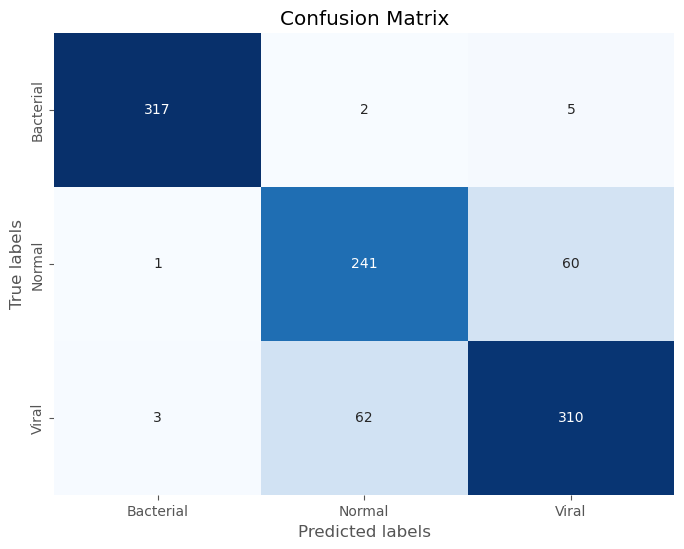

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'model' is the trained model and 'x_test', 'y_test' are the test data
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Define class labels
class_labels = [ 'Bacterial','Normal', 'Viral']

# Compute the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Replace numeric labels with class names
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


32/32 [==============================] - 6s 176ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_7392\4281102497.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


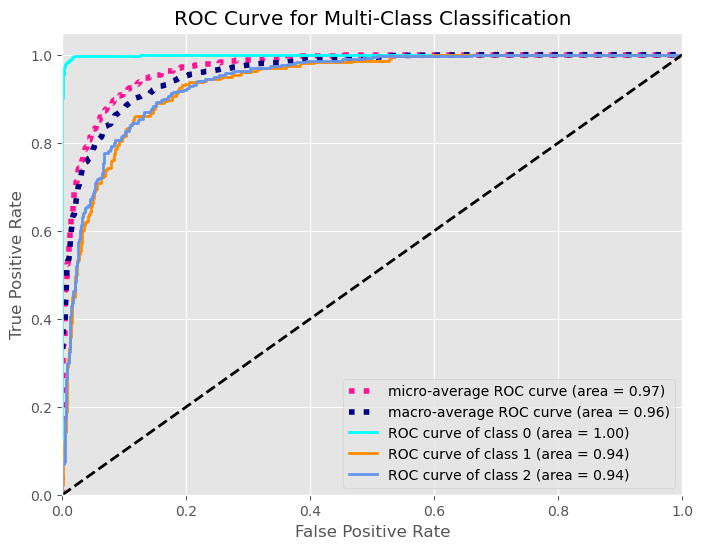

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Assuming 'model' is the trained model and 'x_test', 'y_test' are the test data
y_pred_prob = model.predict(x_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


32/32 [==============================] - 6s 175ms/step


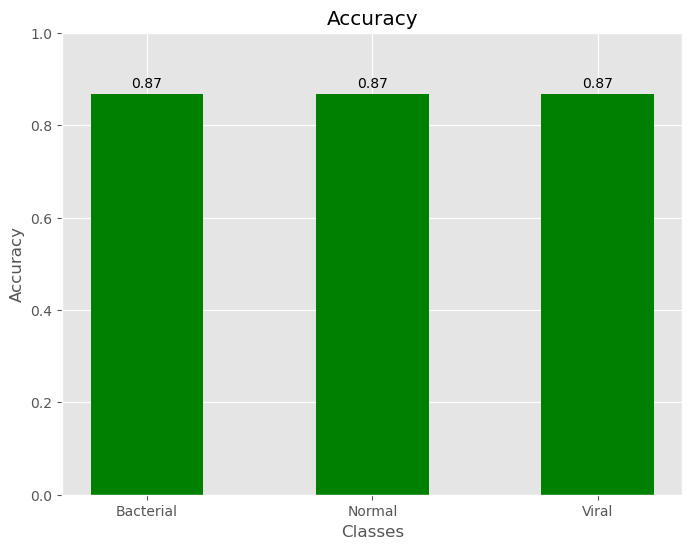

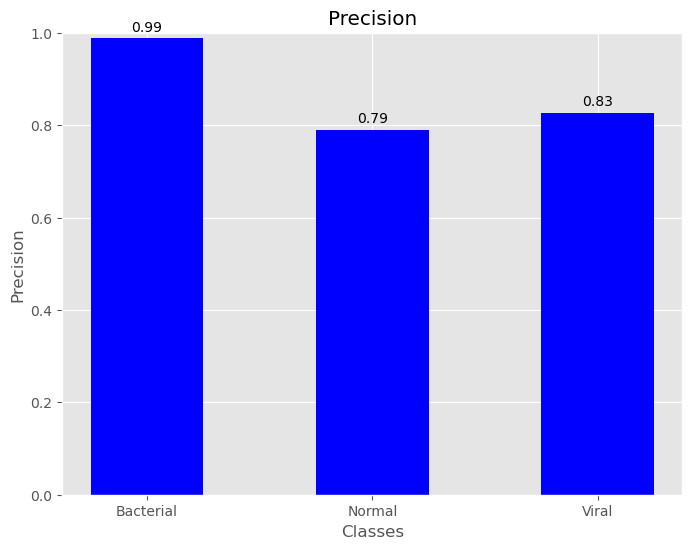

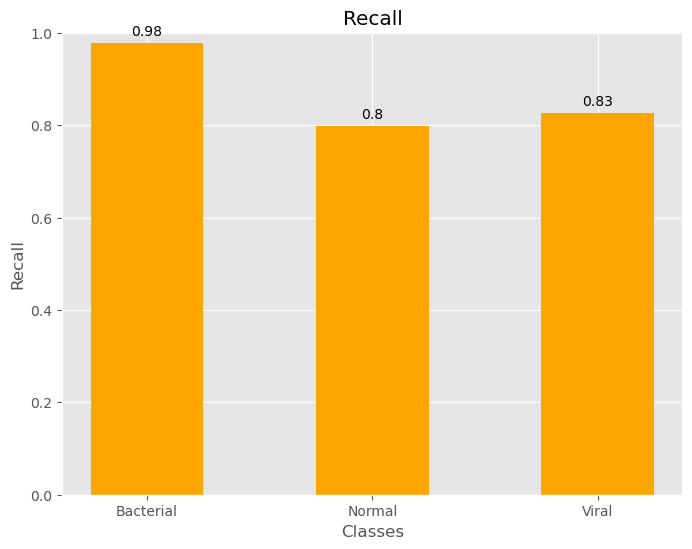

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Assuming 'model' is the trained model and 'x_test', 'y_test' are the test data
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average=None)
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average=None)

# Plotting Accuracy
labels = [ 'Bacterial','Normal', 'Viral']
x = np.arange(len(labels))
width = 0.5

plt.figure(figsize=(8, 6))
accuracy_bar = plt.bar(x, [accuracy] * len(labels), width, label='Accuracy', color='green')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(x, labels)
plt.ylim(0, 1)

# Function to add labels on top of bars
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(accuracy_bar)

plt.show()

# Plotting Precision
plt.figure(figsize=(8, 6))
precision_bar = plt.bar(x, precision, width, label='Precision', color='blue')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision')
plt.xticks(x, labels)
plt.ylim(0, 1)

autolabel(precision_bar)

plt.show()

# Plotting Recall
plt.figure(figsize=(8, 6))
recall_bar = plt.bar(x, recall, width, label='Recall', color='orange')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(x, labels)
plt.ylim(0, 1)

autolabel(recall_bar)

plt.show()
